# A Comparative Analysis of Charlie Gordon's Progress Reports in *Flowers for Algernon*

*Flowers for Algernon* is a novel written by Daniel Keyes in the 1960s. As a popular novel, *Flowers for Algernon* falls into genre of science fiction as it touches on the use of medical treatment and experimentation on the mentally disabled. 

To provide more context for those that are unaware about *Flowers for Algernon*, the story follows the main character, Charlie Gordon, who is a mentally retarded man. He has decided to become a subject for surgical experimentation that he hopes will make him smarter. He is the primary human subject for this experiment, but he is joined by a mouse named Algernon who is also undergoing the same experimentation and is a few weeks ahead. Given that the novel revolves around the experiment and its results, *Flowers for Algernon* is written as a series of progress reports where Charlie Gordon details his experiences and thoughts. In many ways, these progress reports act similar to journal entries, and they not only push along the story from Charlie's perspective but also provide tangible insight to the temporal progression of his mental state. 

Given that Charlie is the only narrator in *Flowers for Algernon*, and his thoughts are clearly segmented by each progress report, this novel is an excellent candidate for literary analysis. There are some major questions that need to be explored. 
- What does the author do to convey the subtle yet noticeable changes of Charlie Gordon's mental state? 
- Can his cognitive improvement over the course of the novel be objectively analyzed in order to prove that, in fact, the experiment is having some sort of impact? If so, what metrics should we look at to document and improve this idea?
- As Charlie's condition changes, how is he impacted and affected by the results?

The following analytical methods will be used to conduct a comparative analysis over the different progress reports in *Flowers for Algernon*. With those results, the above questions can be further understood and answered.

In [1]:
import nltk
from nltk.sentiment import SentimentAnalyzer, SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
ffa = open("flowers_for_algernon.txt", encoding="utf-8")
ffa = ffa.read()
ffaReports = ffa.split("%%%%%")
ffaParas = ffa.split("\n\n")

The first element to analyze is how Charlie Gordon's mental improvement is documented through the way he writes the progress reports. As a reader, it is very clear that the author wants to reflect the effects of the experiment on his writing. Looking at the first progress report, there are many different grammatical and spelling errors. 

For example, here is part of his first report:

Progris riport 1 martch 3.
Dr Strauss says I should rite down what I think and remembir and evrey thing that happins to me from now on. I dont no why but he says its importint so they will see if they can use me. I hope they use me becaus Miss Kinnian says mabye they can make me smart. I want to be smart.

Clearly, he has a relatively poor grasp of the English language. However, looking at the later progress reports, it is clear that he is slowly getting better and better. By the 7th progress report, he titles it correctly for the first time as "Progress Report 7 March 11", though there are still some spelling errors in the actual progress report. By the time he gets to the 14th or 15 progress report, he has command of the English language and is able to correctly form complex sentences and complex thoughts with little to no errors in spellings. 

However, just reading and noticing this improvement is a subjective way of provably identifying progress. The goal of this section is to objectively identify the percent of misspelled words over the course of the entire novel. To determine whether a word is misspelled, the spellchecker library is utilized.

The results include information on the % of misspellings per paragraph and per report. The misspelling rate originally starts off quite high, but very quickly, Charlie Gordon's spelling improves. By about the 9th report, he is showing very few instances of errors in his writing. From a literary criticism standpoint, this actually parallels activity that he continuously does in the novel. To test the improvement of his mental ability, he often completes with the mouse Algernon to complete a maze as fast as possible. Though he starts off very poor and consistently loses to Algernon, the reader can see his progression as he continues to get better and better. While the maze acts as a form of objective feedback about the experiment to the doctors in the novel, it also serves as a form of de-humaniziation against the subject. Charlie is treated more like a mouse that needs to be scientifically analyzed rather than a human being. This is a major theme that is discussed in the novel, and the improvement of his spelling rate or of other objective metrics only further facilities the mistreatment of this mentally disabled subject. As a result, oddly enough, the plot of the mispelling rate tightly correlates with his de-humaniziation.

Lastly, a key thing to note is how there is a rapid spike at the very end of the novel. This is not by accident but by design. The author designed both Charlie and his animal counterpart, Algernon, to have tragic endings, where the experiment to accelerate his intellect does not actually work as a long term solution. If fact, this attempt eventually made his condition worse, so after having seen Charlie become so proficient in reading and writing, he gradually reverts back to his original state and even worsens. By the end, he is no longer able to properly form sentences again, so that is why the % of misspelled words is so high. Though it is not explicitly stated, since Algernon faced the same outcome and ended up dying, Charlie's condition probably got so bad that he passed away after being entered in a mental institution.

In [3]:
def lstOfMisspelledWords(words):
    spell = SpellChecker()
    return spell.unknown(words)

def getParsedWordsFromText(text):
    words = text.split()
    for i in range(len(words)):
        if not words[i][-1].isalpha():
            words[i] = words[i][:-1]
    words = [word for word in words if word.isalpha()]
    return words

In [4]:
def calculateMisspellingsThroughoutText():
    paraErrors = []
    for num, report in enumerate(ffaReports):
        words = getParsedWordsFromText(report)
        print("Report " + str(num+1), round(len(lstOfMisspelledWords(words)) / len(words), 4))
    for para in ffaParas:
        if len(para) < 20:
            continue
        words = getParsedWordsFromText(para)
        errorRate = len(lstOfMisspelledWords(words)) / len(words)
        paraErrors.append(errorRate)
    plt.plot(paraErrors)
    plt.show()

Report 1 0.1534
Report 2 0.0914
Report 3 0.1007
Report 4 0.0756
Report 5 0.1128
Report 6 0.1099
Report 7 0.0684
Report 8 0.0445
Report 9 0.0062
Report 10 0.0052
Report 11 0.0026
Report 12 0.0017
Report 13 0.0049
Report 14 0.0033
Report 15 0.0046
Report 16 0.0026
Report 17 0.0117


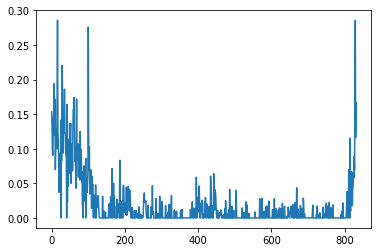

In [5]:
calculateMisspellingsThroughoutText()

While looking at the percent of misspelled words is very insightful, it does not tell the whole story. As seen above, Charlie Gordon improves his spelling rate quite quickly, but there are noticeable improvements that are more subtle to the human eye. This continues even as Charlie makes very few spelling mistakes, but change in these metrics over time also tell a larger story. This code analyzes 4 different metrics that seek to answer both the first and second question stated at the beginning. Some of these, which are more nuanced that others, are utilized by the author to convey that Charlie continues to improve past English spelling. It is not easy to simply point to the improvement, but by analyzing the text programatically, the objective results indicate how the author conveys the slow but tangible changes in Charlie's condition.

The four metrics that are being analyzed are the following: 
- Length of Each Report
- Average Number of Words in a Sentence for Each Report
- Type Token Ratio for Each Report
- Number of Different Parts of Speech Used in Each Report

The results are normalized to be in a range of 0 to 1 so that the results can be seen alongside other metrics. Therefore, the exact normalized result is not as important as how it changes over the course of *Flowers for Algernon*. As displayed in the plot below, the results are quite interesting and insightful. Though at different rates, there are two metrics that increase over the course of the novel while two metrics decrease. 

The two metrics that increased are the length of each report and the number of different parts of speech used in each report. The former change is quite obvious since the reader can easily notice that the latter progress reports and much longer than the former ones. It is generally clear that Charlie is writing more and more in each progress report as his intelligence improves. Since the deterioration of his mental ability mostly occurs in the very last report, that is not quite as easily reflected in the plot. Similarly, Charlie uses a larger variety of parts of speech as his mental condition improves. This metric is useful because it is very much a relevant metric when trying to answer the initial questions. Those people with more command of the English language likely used a larger variety in their parts of speech, so tracking that over the progress reports accurately provides insight into his condition. This is something that likely would be hard for someone to identify manually, but they can probably feel that the sentences are becoming more complex and the language is becoming more sophisticated. 

On the other hand, we have two other metrics that decrease over time: the type token ratio for each report and the average number of words in a sentence for each report. The interesting fact is that both are rather surprising and counter-intuitive results. One would expect that as Charlie became smarter, he would have a largeer diversity of words, thus a higher type token ratio, and longer sentences. However, after closer examination, even these results can be justified. The reason Charlie's type token ratio decreases over the course of his reports has more to do with the fact that the reports become longer rather than the diversity of his word choice. The first few reports are very short, so just due to a smaller sample size and fewer thoughts, there is a smaller likelihood that he will need to repeat words, thoughts, or ideas at any point in time. However, once his writing becomes more sophisticated, he will tend to repeat more words that before. Additionally, since he has spelling issues in the beginning, even if he repeats a words he likely spells it differently each time. The other metric, average words per sentence, is also deceptively tricky. One would imagine that Charlie uses longer sentences throughout the novel, but he doesn't end up doing so. The reason for this is actually quite simple. When asked to write a paragraph, a child would probably have longer sentences that an educated adult. This is because the child would likely have run-on sentences, multiple ideas in one sentence, and possibly a lack of punctuation. That is the same with Charlie Gordon, who in the first report had a sentence like this: "I tolld dr Strauss and perfesser Nemur I cant rite good but he says it dont matter he says I shud rite just like I talk and like I rite compushishens in Miss Kinnians class at the beekmin collidge center for retarted adults where I go to lern 3 times a week on my time off". Clearly this is a very long sentence, and this is due to the fact that he was told to write like he talks. Since people don't normally think of punctuations while talking, he actually prolongs his sentence. Thus, when he becomes smarter, he knows better when to break a sentence into two sentences or ideas. This explains why his sentences actually become shorter over the many progress reports. These results may not have even been intended by the author, but they definitely are by-products of the author's intention to objectively show the subtle changes in Charlie Gordon's mental condition.

In [6]:
def normalize(data):
    return [elem / max(data) for elem in data]

def lengthOfEachReport():
    lengths = [len(report) for report in ffaReports]
    return lengths

def avgWordsPerSentencePerReport():
    avgWords = []
    for index, report in enumerate(ffaReports):
        sent_list = nltk.sent_tokenize(report)
        total = 0
        for sent in sent_list:
            wordsInSentence = getParsedWordsFromText(sent)
            total += len(wordsInSentence)
        avgWords.append(total / len(sent_list))
    return avgWords

def ttr(text):
    words = getParsedWordsFromText(text)
    return len(set(words)) / len(words)

def ttrPerReport():
    return [ttr(report) for report in ffaReports]

def posDiversity():
    spell = SpellChecker()
    sizes = []
    for report in ffaReports:
        words = getParsedWordsFromText(report)
        words = [spell.correction(word) for word in words]
        wordsTagged = nltk.pos_tag(words)
        numOfPOS = len(Counter([tag for word, tag in wordsTagged]))
        sizes.append(numOfPOS)
    return sizes

In [7]:
posDiversityResults = posDiversity()
reportLengthResults = lengthOfEachReport()
avgWordsResults = avgWordsPerSentencePerReport()
ttrResults = ttrPerReport()

*** Legend ***
Blue: Normalized POS Diversity
Orange: Normalized Report Length
Green: Normalized Avg. # of Words Per Sentence
Red: Type Token Ratio


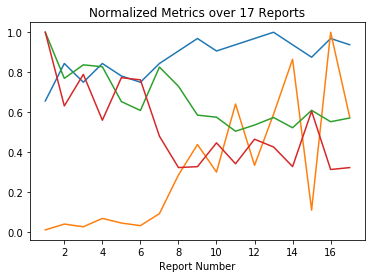

In [8]:
print("*** Legend ***")
print("Blue: Normalized POS Diversity")
print("Orange: Normalized Report Length")
print("Green: Normalized Avg. # of Words Per Sentence")
print("Red: Type Token Ratio")
plt.title("Normalized Metrics over 17 Reports")
reportNums = range(1, 18)
plt.plot(reportNums, normalize(posDiversityResults), label="POS Diversity")
plt.plot(reportNums, normalize(reportLengthResults), label="Report Length")
plt.plot(reportNums, normalize(avgWordsResults), label="Avg # of Words Per Sentence")
plt.plot(reportNums, normalize(ttrResults), label="Type Token Ratio")
plt.xlabel("Report Number")
plt.show()

# Sentiment Analysis

Lastly, this report seeks to answer the 3rd of the original questions and analyze how Charlie's condition changes over time due to this increase in "smartness". In order to do so, a sentiment analysis is conducted and the polarity of each paragraph is analyzed over the course of *Flowers for Algernon*. Once again, the results are quite interesting and reflect on more than just what the text presents. The beginning of the novel is when Charlie has the highest positive sentiment, and that is likely due to two reasons. First, Charlie doesn't express that much emotion in his writing in the very beginning due to his limitations with the language, so it is not very easy to detect much negative sentiment. However, the larger reason the early peak has to do with the running theme that the author is trying to achieve: ignorance is bliss. The book constantly tries to highlight Charlie's battle between maintaining emotion and warth while also gaining an immense amount of intellect. However, the endeavor initially seems to be zero-sum, so the smarter Charlie gets, the more critical and self-aware he is of the world around him. While in the beginning he was happy and innocent, by the middle of the novel he is jaded and cold. One of his love interests, Alice, tries to get him to balance the emotion with the intelligence, and that likely explains the last peak. However, he later finds out that Algernon has died and deduces that he too will likely have mental deterioration and die as well, resulting in the sharp drop. After the novel approaches its end, the reader can tell that the mood changes, and this sentiment analysis is able to objectively show how Charlie is impacted the fluctuation of his intelligence.

Looking at the mean, standard deviation, and range of the polarity, there are a few things to note. On average, Charlie generally has a neutral sentiment, but the range of nearly 1.99 is quite alarming. To contextualize that range, let's consider 2 sentences, one which is positive and the other which is negative:
- Positive Sentence: I love, enjoy, and appreciate being extremely happy when the sun is shining and the flowers are blooming! All is good with the world and we can smile about all our blissful and peaceful memories! I'm so thankful for all my extraordinary successes and I am wholeheartedly enthusiastic about the future!
- Negative Sentence:  I am so sad, unhappy, and heartbroken. I am constantly in a state of misery. The world is bleak and colorless. There is absolutely no purpose in this horrible sea of depression. When will this pain stop? The slow march towards death and destruction is inevitable, and I will live every day in regret.

The range/difference in sentiment between these 2 sentences is only 1.98, so that really highlights the highs and lows that Charlie experienced throughout the experiment.  

Average Sentiment:  0.12452052821128469
Standard Deviation of Sentiment:  0.643370244597444
Range of Sentiment:  1.9873



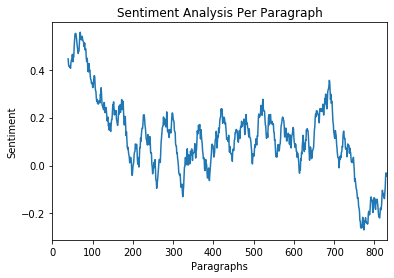

In [9]:
def getSentiment(text):
    sentimentAnalyzer = SentimentIntensityAnalyzer()
    scores = sentimentAnalyzer.polarity_scores(text)
    sentiment = scores['compound']
    return sentiment

def getSentimentList():
    sentimentList = [getSentiment(para) for para in ffaParas]
    return pd.Series(sentimentList)

sentimentList = getSentimentList()
plt.title("Sentiment Analysis Per Paragraph")
plt.xlabel("Paragraphs")
plt.ylabel("Sentiment")
sentimentList.rolling(40).mean().plot()
print("Average Sentiment: ", sentimentList.mean())
print("Standard Deviation of Sentiment: ", sentimentList.std())
print("Range of Sentiment: ", sentimentList.max() - sentimentList.min())
print()

It is evident that all the above data provides much insight into answering the original three questions. Both the % of misspelled words and the plot of different metrics convincingly answered questions 1 and 2, giving insight into how the author uses different literary techniques to convince the reader that Charlie is, in fact, getting better. These results can be objectified and tell the same story as what is subjectively felt by the reader (with some interesting surprises like average sentence length). This last plot on sentiment analysis how it truly gives more insight on the change in Charlie's condition as he gains/loses intelligence through his condition. The polarity ties well not only with the story but also the larger theme that the author addresses: the battle between intelligence and emotion. All of these data points come together and give a visual, objective analysis over the progress reports of the tragic main character, Charlie Gordon. 